# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

#### Описание данных
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

### План по выполнению проекта
Шаг 1. Открыть файл с данными и изучить общую информацию

Изучить общую информацию о полученном датафрейме.
Построить гистограмму для всех числовых столбцов таблицы на одном графике. 

Шаг 2. Выполнить предобработку данных
Найти и изучить пропущенные значения в столбцах:
Заполните пропущенные значения там, где это возможно. Если логичную замену предложить невозможно, то оставить пропуски. Пропущенные значения — тоже важный сигнал, который нужно учитывать.
Найти столбцы, в которых нужно изменить тип данных.
Преобразовать тип данных в выбранных столбцах.
Изучить уникальные значения в столбце с названиями и устраните неявные дубликаты. 

Шаг 3. Добавить в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра (округлить до двух знаков после запятой);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (км, округлить до ближайших целых значений)
- стоимость квартиры в млн.

Шаг 4. Провести исследовательский анализ данных:
 - Изучить параметры объектов и построить отдельные гистограммы для каждого из параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. При построении гистограмм удалить их. 
Если природа аномалии понятна и данные действительно искажены, то восстановить корректное значение. В противном случае удалить редкие и выбивающиеся значения.
 - Изучить, как быстро продавались квартиры. Построить гистограмму. Посчитать среднее и медиану. Какие продажи можно считать быстрыми, а какие — необычно долгими?
Определить факторы, которые больше всего влияют на общую (полную) стоимость объекта.
 - Изучить, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой).
Построить графики, которые покажут зависимость цены от указанных выше параметров. 
 - Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построить сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.
 - Вычислить среднюю стоимость квартир на разном удалении от центра. Построить график изменения средней цены для каждого километра от центра Петербурга.

Шаг 5. Написать общий вывод.
Описать полученные результаты и зафиксировать итоговый вывод проведённого исследования.

### Файл с данными и общая информация. 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep = '\t')
except:
    print('Ошибка загрузки файла')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
#чтобы часть столбцов не скрылась при выводе, установим опцию отображения количества столбцов
pd.set_option('display.max_columns', 50) 
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


(23699, 22)

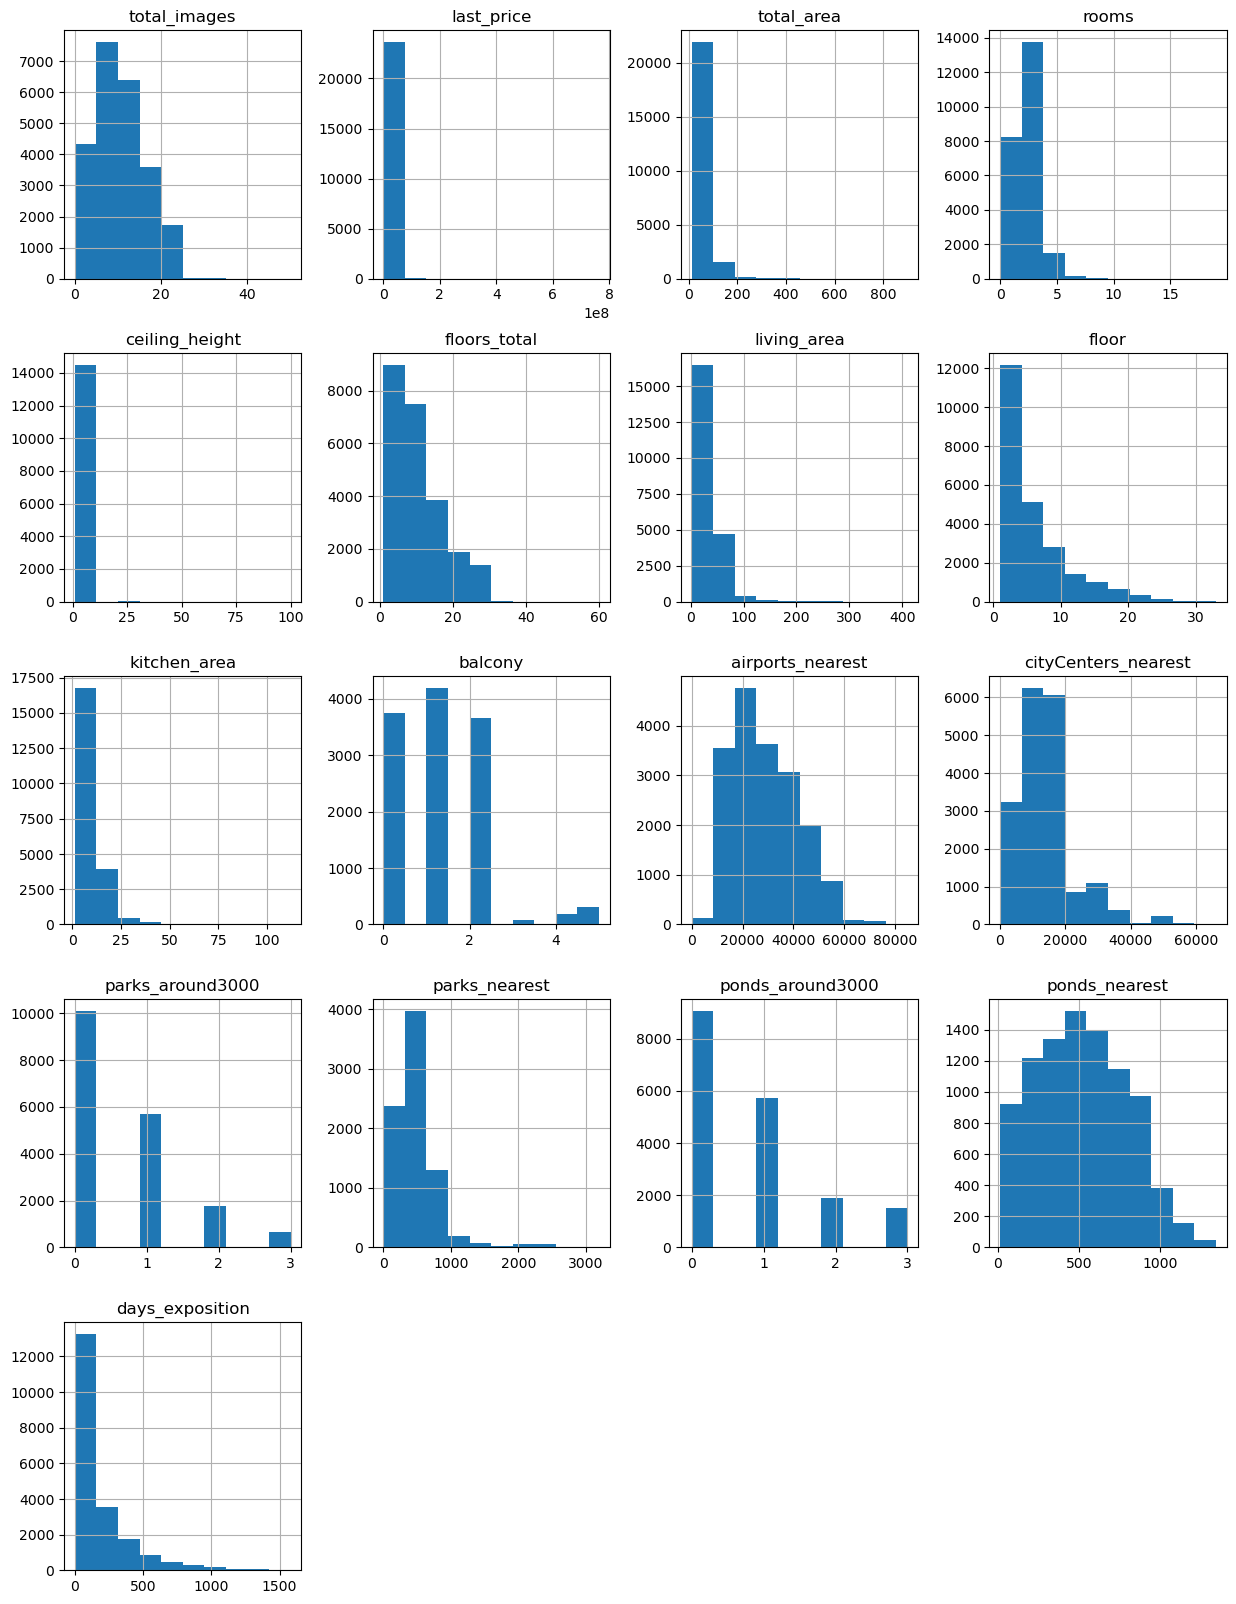

In [4]:
#построим гистаграммы распределения числовых данных 
data.hist(figsize=(15, 20))
data.shape

### Первые выводы о распределении данных:
- количество фотографий в объявлениях составляет от 0 до 40 штук, в среднем 10;
- чаще продают 3 к. кв.;
- в дата сете представлены данные о квартирах преимущественно в домах от 2 до 12 этажей, и в меньшей степени в домах с 14-30 этажами, однако есть редкие случаи домов с более чем 30 этажами;
- встречаются объявления, где жилая площадь составляет 0 м.кв., нужно проверить такие строки;
- чаще всего встречаются этажи с 2 по 4;
- кухни более 13 м.кв. встречаются не часто;
- чаще всего в квартирах есть хотя бы один балкон, чуть меньше квартир вовсе не имеют балкона, еще примерно столько же имеют по 2 балкона. Реже встречаются квартиры с 3 балконами и более;
- совсем близко к аэропорту находится очень мало квартир, в основном расстояние составляет от 8 до 40 км;
- большая часть квартир находится на удалении от центра на 7-20 км, однако встречаются квартиры, расположенные на меньшем расстоянии от центра и непосредственно в центре;
- чуть более половины квартир находится в дали от парков (более 3 км);
- если парк поблизости есть, до него, как правило, не более 1 км;
- около половины квартир имеют поблизости по крайней мере хотя бы 1 водоем;
- если водоем поблизости есть, до него, как правило, не более 1 км;
- в основном квартиры продают за 150 дней и менее.

Другие данные требуют более детальной настройки вывода гистрограмм распределения для дачи корректной оценки. Так например, гистограмма last_price не дает возможности оценить распределение значений.
Очевидно, в параметре ceiling_height присутствуют выбросы, значение высоты потолка 25 м кажется сомнительным. 

In [5]:
# добавим столбец, в котором значения last_price переведем в млн.
data['last_price_mln'] = data['last_price']/1000000

<Axes: >

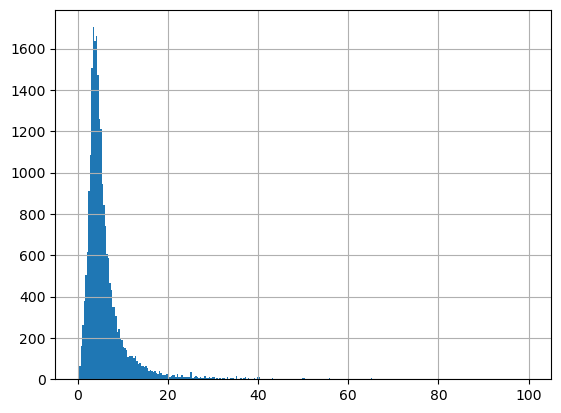

In [6]:
#построим более "чувствительную" гистрограмму распределения значений цены на квартиры
data['last_price_mln'].hist(bins = 300, range = (0, 100))

Стоимость квартир распределилась преимущественно в диапазоне от 2 до 8 млн, присутствуют также в незначительном количестве квартиры от 20 до 60 млн, редко выше.

### Предобработка данных

In [7]:
#приведем имя столбца cityCenters_nearest в общий вид
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}) #привели имя столбца в общий вид
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [8]:
#проверим, есть ли явные дубликаты строк
data.duplicated().sum()

0

Явных дубликатов нет.

In [9]:
# посмтрим процент пропущенных данных 
percent_missing = data.isnull().sum() * 100 / len(data)
display(percent_missing)

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
last_price_mln           0.000000
dtype: float64

Параметр is_apartment отсутствует у 88% данных. Можно предположить, что параметр заполнен только в том случае, когда объект недвижимости является апартаментами, в ином случае просто пропущен. 
Информация о количестве парков и водоемов отсутствует в более чем 60% строк, что существенно может повлиять на анализ проекта при использовании данных параметров.
Расстояние до аэропорта, центра города, наличие водоема не заполнен на 20% и более. 
Также пропуски составляют 16% от столбца с количеством дней публикации, и по 5% у жилой площади и площади кухни. 

In [10]:
#сохраним размерность данных для сравнения после предобработки
data_len = data.shape
data_len

(23699, 23)

In [11]:
#выводим уникальные значения столбца "балкон"
display('Количество уникальных значений в столбце "балкон"', data['balcony'].unique())

#будем считать, что если наличие балкона не указано, то он отсутствует, 
# и заменим пустоты в столбце с балконами на 0
data['balcony'] = data['balcony'].fillna('0')

'Количество уникальных значений в столбце "балкон"'

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [12]:
#выводим уникальные значения столбца "апартаменты"
display('Количество уникальных значений в столбце "апартаменты"', data['is_apartment'].unique()) 

#заменяем пустоты в столбце с балконами на False, т.е. такие объекты не будут считаться апартаментами
data['is_apartment'] = data['is_apartment'].fillna(False) #


'Количество уникальных значений в столбце "апартаменты"'

array([nan, False, True], dtype=object)

Вместо отсутствующих значений столбцов "балкон" и "апартаменты" мы внесли 0 и False соответственно, полагая, что данные параметры могли могли не заполнить ввиду того, что в жилом помещении отсутствует балкон, а признак "апартаменты" не применим. 

In [13]:
#посмотрим количество пропусков параметра locality_name, 
# частнотность повторений намименований населенных пунктов, найдем наиболее часто встречающийся
display('Количество пропусков в столбце "название населенного пункта"', len(data[data['locality_name'].isna()]))
display(data['locality_name'].value_counts())
# заменим неизвестные населенные пункты на значение "другой"
data['locality_name'] = data['locality_name'].fillna('Другой')

'Количество пропусков в столбце "название населенного пункта"'

49

locality_name
Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: count, Length: 364, dtype: int64

In [14]:
# посчитаем количество пропусков в столбце ceiling_height
display('Количество пропусков в столбце "высота потолка"', len(data[data['ceiling_height'].isna()]))

'Количество пропусков в столбце "высота потолка"'

9195

In [15]:
# посчитаем количество пропусков в столбце rooms
display('Уникальные значения в столбце "количество комнат"', data['rooms'].unique()) 

#пропусков нет, но обнаружены аномальные значения
display('Количество пропусков в столбце "количество комнат"', len(data[data['rooms'].isna()]))


'Уникальные значения в столбце "количество комнат"'

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

'Количество пропусков в столбце "количество комнат"'

0

In [16]:
f'{len(data.query('rooms>9'))/len(data):.2%}'

'0.05%'

В количестве комнат встречаются неожиданные значения. Процент выбросов (более 9 комнат) в столбце "количество комнат" составляет менее 0.5%. 

count    23688.000000
mean         2.065603
std          1.051309
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

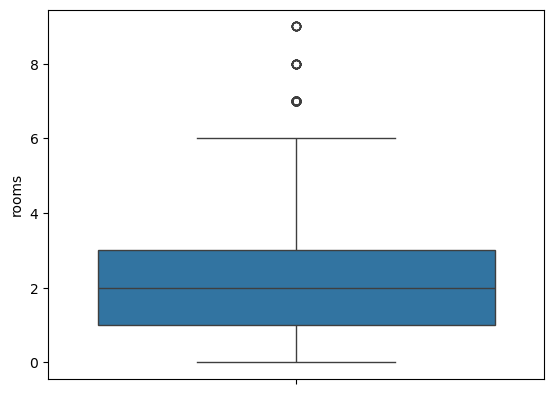

In [17]:
#делаем срез по диапазону комнат (0: 9) м
data = data.drop(data[data['rooms'] > 9].index) 

sns.boxplot(data=data['rooms'])
data['rooms'].describe()

In [18]:
display('Количество уникальных значений в столбце "свободная планировка"', data['open_plan'].unique())

'Количество уникальных значений в столбце "свободная планировка"'

array([False,  True])

In [19]:
display('Количество уникальных значений в столбце "студия"', data['studio'].unique()) 

'Количество уникальных значений в столбце "студия"'

array([False,  True])

В столбцах, содержащих данные, имеет ли квартира свободную планировку и является ли студией, посторонних значений не обнаружено.

Приводим содержимое столбцов к корректным типам данных для использования в расчетах.

In [20]:
data['balcony'] = data['balcony'].astype(int)

data['is_apartment'] = data['is_apartment'].astype(bool) #меняем формат значений на булев тип

data['ceiling_height'] = pd.to_numeric(data['ceiling_height'])

data['days_exposition'] = pd.to_numeric(data['days_exposition'])

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition']) #в столбце с датой размещения поменяли дип данных на релевантный

data['floor'] = pd.to_numeric(data['floor']) #пропуски в столбце отсутствуют, поэтому просто переведем значения в числовой формат

data['floors_total'] = pd.to_numeric(data['floors_total'])

data['kitchen_area'] = pd.to_numeric(data['kitchen_area'])

data['last_price'] = pd.to_numeric(data['last_price'])

data['living_area'] = pd.to_numeric(data['living_area'])

data['open_plan'] = data['open_plan'].astype(bool) #устанавливаем в столбце булев тип данных

data['parks_nearest'] = pd.to_numeric(data['parks_nearest'])

data['rooms'] = data['rooms'].astype(int)

data['studio'] = data['studio'].astype(bool) #устанавливаем в столбце булев тип данных

data['total_area'] = pd.to_numeric(data['total_area'])

data['total_images'] = data['total_images'].astype(int)


In [21]:
#построим сводную таблицу, чтобы узнать, сколько комнат указывают при продаже квартир студий и квартир с открытой планировкой  
data.pivot_table (index = ['rooms'], values = ['open_plan', 'studio'], aggfunc = 'sum')

,open_plan,studio
rooms,,
0,59,138
1,3,11
2,1,0
3,2,0
4,1,0
5,1,0
6,0,0
7,0,0
8,0,0


Из сводной таблицы мы видим, что 138 студий считаются квартирами с 0 комнатами, а 11 - однокомнатными. Приведем студии к одному виду.

In [22]:
#присвоим количество комнат 0 для квартир-студий
data.loc[(data['rooms'] > 0) & (data['studio'] == True), 'rooms'] = 0

In [23]:
#посмотрим сколько каких значений принимает параметр locality_name
data['locality_name'].value_counts()

locality_name
Санкт-Петербург                   15710
посёлок Мурино                      522
посёлок Шушары                      440
Всеволожск                          398
Пушкин                              369
                                  ...  
поселок Гладкое                       1
посёлок городского типа Рябово        1
поселок Цвылёво                       1
поселок городского типа Рябово        1
посёлок Дзержинского                  1
Name: count, Length: 365, dtype: int64

In [24]:
#посмотрим все уникальные значения locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [25]:
#уберем все наименования видов населенных пунктов, чтобы привести значения к единому стандарту и исключить дублирование 
data['locality_name'] = data['locality_name'].str.replace \
    ('поселок|посёлок|коттеджный|деревня|садовое товарищество|городского типа|городской', "", regex=True).str.strip() 
data['locality_name'].value_counts() 

locality_name
Санкт-Петербург    15710
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
                   ...  
Новая Ропша            1
Курковицы              1
Левашово               1
Пикколово              1
Дзержинского           1
Name: count, Length: 311, dtype: int64

Устранили дубликаты в locality_name. Количество уникальных значений снизилось с 364 до 310.

count    14495.000000
mean         2.771214
std          1.261382
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

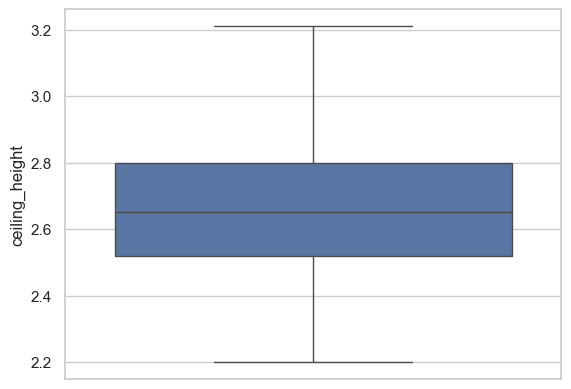

In [26]:
# построим диаграмму размаха для параметра ceiling_height
sns.set(style="whitegrid")
sns.boxplot(data=data['ceiling_height'], showfliers=False)
# отсекли выбросы, из-за величины которых диаграмма неинформативна

data['ceiling_height'].describe()

50% значений высоты потолков находятся в диапазоне 2,2 - 3,2 м.
Также в столбце присутствуют выбросы, максимальное значение достигает 100 м.

In [27]:
#посмотрим процент пропусков в ceiling_height
f'{data['ceiling_height'].isnull().sum()/len(data):.2%}'

'38.81%'

In [28]:
#посмотрим количество и % аномальных значений в ceiling_height
display(len(data.query('ceiling_height > 10 | ceiling_height < 2.2')['ceiling_height']))

f'{len(data.query('ceiling_height < 2.2 | ceiling_height > 10'))/len(data):.2%}'

39

'0.16%'

Процент аномальных значений высоты потолков (0,16%) позволяет нам отбросить значения, выбивающиеся из диапазона (2,2 : 10) м

count    14456.000000
mean         2.728513
std          0.291696
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

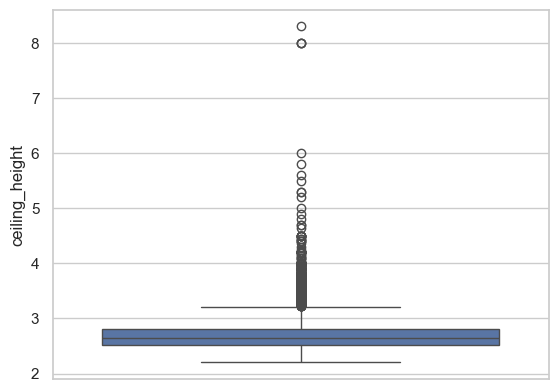

In [29]:
#делаем срез по диапазону потолков (2,2: 10) м
data = data.drop(data[(data['ceiling_height'] > 10) | (data['ceiling_height'] < 2.2)].index) 

sns.boxplot(data=data['ceiling_height'])
data['ceiling_height'].describe()

Диаграмма размаха стала более наглядной, однако верхние выбросы все еще делают "ящик" плоским.

count    23649.000000
mean         6.517343
std         10.545234
min          0.012190
25%          3.406000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price_mln, dtype: float64

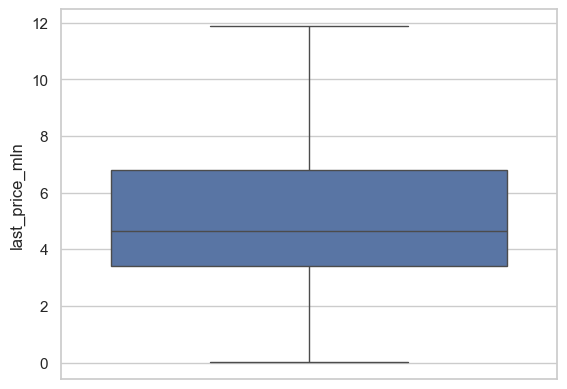

In [30]:
#посмотрим на значения в столбце last_price_mln
sns.boxplot(data['last_price_mln'], showfliers=False)
data['last_price_mln'].describe()

Половина квартир находится в дипазоне цен 3,4 - 6,8 млн. Минимальное значение в 12 190 руб. выглядит сильно подозрительно. 

In [32]:
#посчитаем процент значений стоимости квартир менее 500 тыс.
f'{len(data.query('last_price_mln < 0.5'))/len(data):.2%}'

'0.06%'

0.06 % аномальных значений стоимости квартир можно исключить из дасасета.

In [33]:
data = data.query('last_price_mln >= 0.5')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<Axes: >

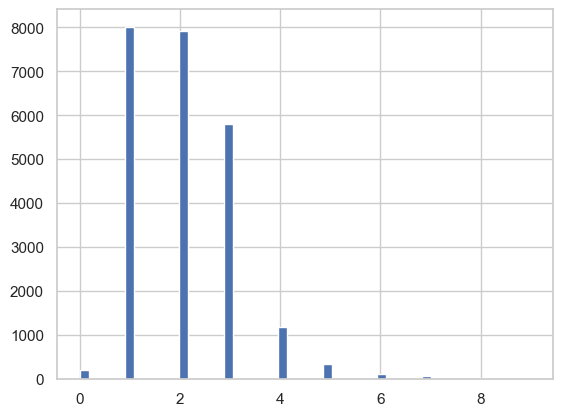

In [34]:
#посмотрим уникальные значения параметра rooms и их распределение
display(sorted(data['rooms'].unique()))
data['rooms'].hist(bins = 50)

<Axes: ylabel='rooms'>

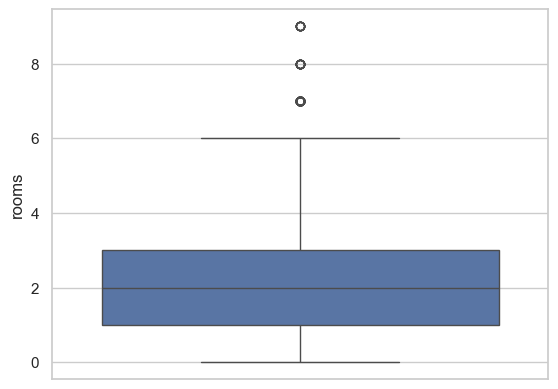

In [35]:
sns.boxplot(data=data['rooms'])

Значения количества комнат от 0 до 16. Гистограммы распределения и размаха показывают, что 50% это квартиры с 1-3 комнатами, основной диапазон значений (0: 6).

In [36]:
percent_missing2 = data.isnull().sum() * 100 / len(data)

df = pd.DataFrame({'Before': percent_missing, 'After': percent_missing2})
display(df)

,Before,After
total_images,0.000000,0.000000
last_price,0.000000,0.000000
total_area,0.000000,0.000000
first_day_exposition,0.000000,0.000000
rooms,0.000000,0.000000
ceiling_height,38.799105,38.849164
floors_total,0.362885,0.363867
living_area,8.029875,8.022001
floor,0.000000,0.000000
is_apartment,88.290645,0.000000


In [38]:
#посчитаем, какое количество данных в результате предобработки
f'{data.shape[0]/data_len[0]:.2%}'

'99.73%'

В результате преобработки данных нам удалось снизить количество пропусков, в некоторых столбцах заполнить полностью (is_apartment, balcony), заменить значение количества комнат в студиях (rooms), отфильтровать выбивающиеся значения (ceiling_height, rooms), устранить дубликаты (locality_name), при этом мы сохранили 99,73% первоначальных данных.          

### Посчитайте и добавьте в таблицу новые столбцы

In [39]:
#добавим столбец с ценой за кв.м.
data['m2_price'] =  round(data['last_price'] / data['total_area'] , 2)

In [40]:
#добавили столбец с днем недели публикации объявления
data['day_publication'] = data['first_day_exposition'].dt.dayofweek 
#добавили столбец с месяцем публикации объявления
data['month_publication'] = data['first_day_exposition'].dt.month 
#добавили столбец с годом публикации объявления
data['year_publication'] = data['first_day_exposition'].dt.year 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_mln,m2_price,day_publication,month_publication,year_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,13.000,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,3.350,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,5.196,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,64.900,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,10.000,100000.00,1,6,2018


<Axes: >

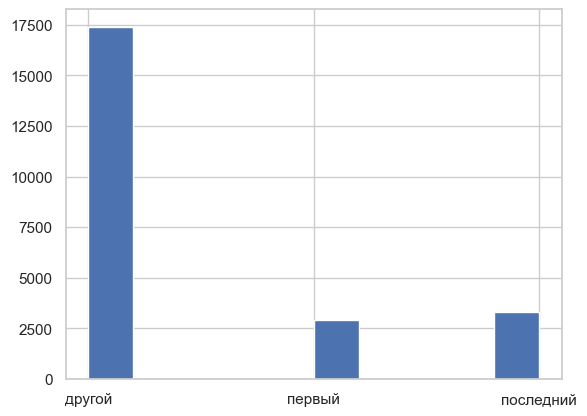

In [41]:
#функция для определения категории этажа
def floor_type(row):
    try:
        if row['floor'] == 1.0:
            return 'первый'
        if row['floor'] == row['floors_total']:
            return 'последний'
        return 'другой'
    except:
        return 'другой'
        
#создадим столбец с категориями этажей
data['floor_type'] =data.apply(floor_type, axis=1)

#посмотрим, как распределились значения
data['floor_type'].hist()


Добавили столбец с категориями этажей.

In [43]:
#посчитаем расстояние до центра в км

#создадим новый столбец с округлением до целых значений
data['to_citycenter_km'] = round(data['city_centers_nearest'] / 1000, 0) 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_mln,m2_price,day_publication,month_publication,year_publication,floor_type,to_citycenter_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,13.000,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,3.350,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,5.196,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,64.900,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,10.000,100000.00,1,6,2018,другой,8.0


Добавили столбец с расстоянием до центра в км.

### Исследовательский анализ данных

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'first_day_exposition'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'kitchen_area'}>],
       [<Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'city_centers_nearest'}>,
        <Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>],
       [<Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>,
        <Axes: title={'center': 'days_exposition'}>,
        <Axes: title={'center': 'last_price_mln'}>,
        <Axes: title={'center': 'm

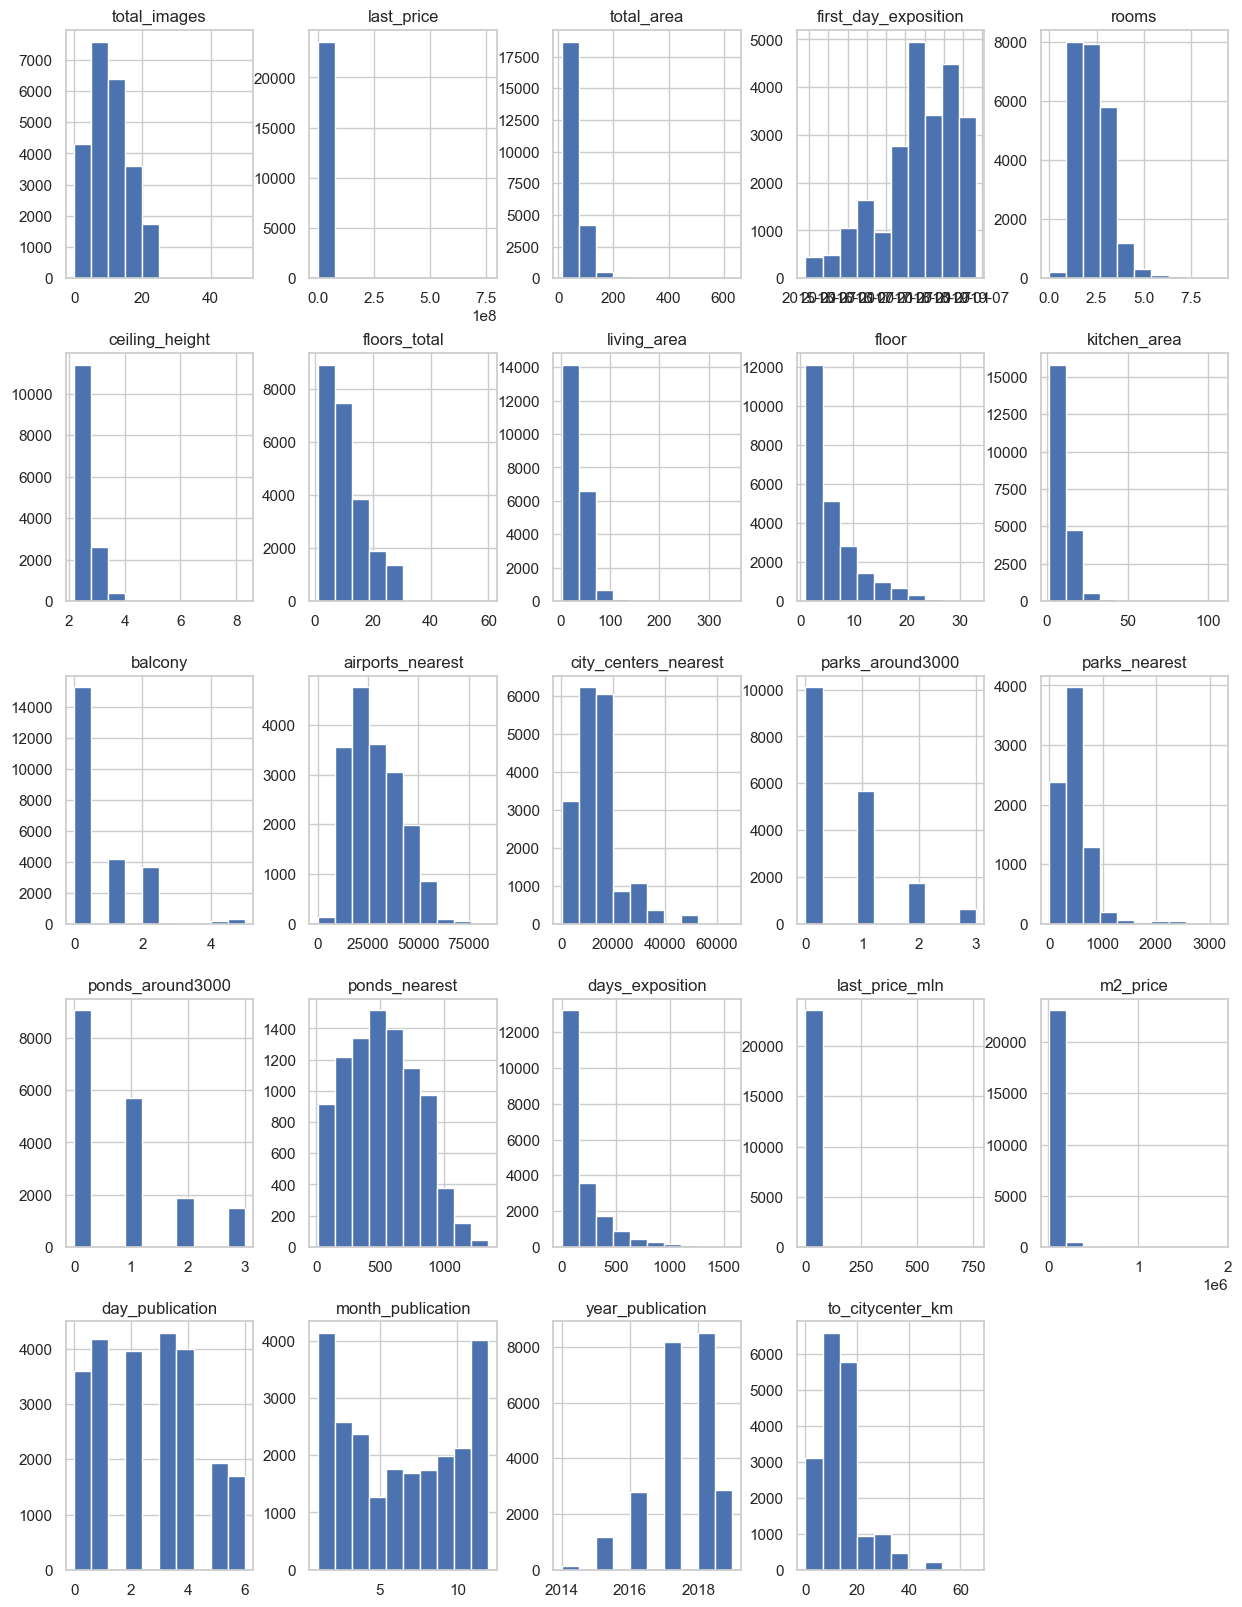

In [44]:
data.hist(figsize=(15, 20))

После предварительной обработки данных гистограммы визуально изменились незначительно, можно заметить, что активность продаж кратно возрасла с 2017 года, пик приходится на 2018, в 2019 году продажи резко снизились. 

count    20466.000000
mean       180.920649
std        219.668868
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

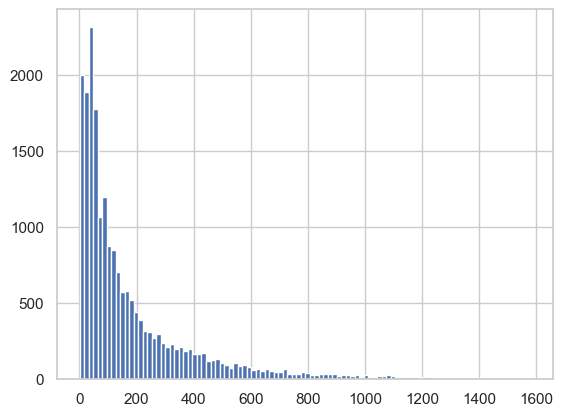

In [45]:
#изучим скорость продажи квартир
data['days_exposition'].hist(bins = 100)
data['days_exposition'].describe()

В среднем квартиры продаются за полгода или 181 день, самая быстрая продажа произошла за 1 день, самая долгая длилась 1580 дней. Медианное значение - 95 дней (3 месяца).
Быстрыми можно считать продажи, укладывающиеся в значения первого квартиля - до 45 дней (1,5 месяца), долгими - те, что длились свыше 245 дней (более полугода).

In [46]:
#возьмем 10 самых распространенных населенных пункта
data_10 = pd.Series(data['locality_name'].value_counts())
top_10_locality = data_10.index[:10]


In [47]:
#создадим вспомогательную таблицу с 10 основными населенными пунктами
data_top_10 = data.query('locality_name in @top_10_locality') 
data_top_10.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_mln,m2_price,day_publication,month_publication,year_publication,floor_type,to_citycenter_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,13.000,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,3.350,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,5.196,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,64.900,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,10.000,100000.00,1,6,2018,другой,8.0


,locality_name,m2_price
8,Санкт-Петербург,114820.504888
7,Пушкин,103125.819377
4,Кудрово,95326.179108
6,Парголово,90175.913089
5,Мурино,86064.821173
9,Шушары,78677.364318
3,Колпино,75424.579112
2,Гатчина,68757.678399
0,Всеволожск,68719.320378
1,Выборг,58238.143277


Text(0, 0.5, 'Стоимость жилья')

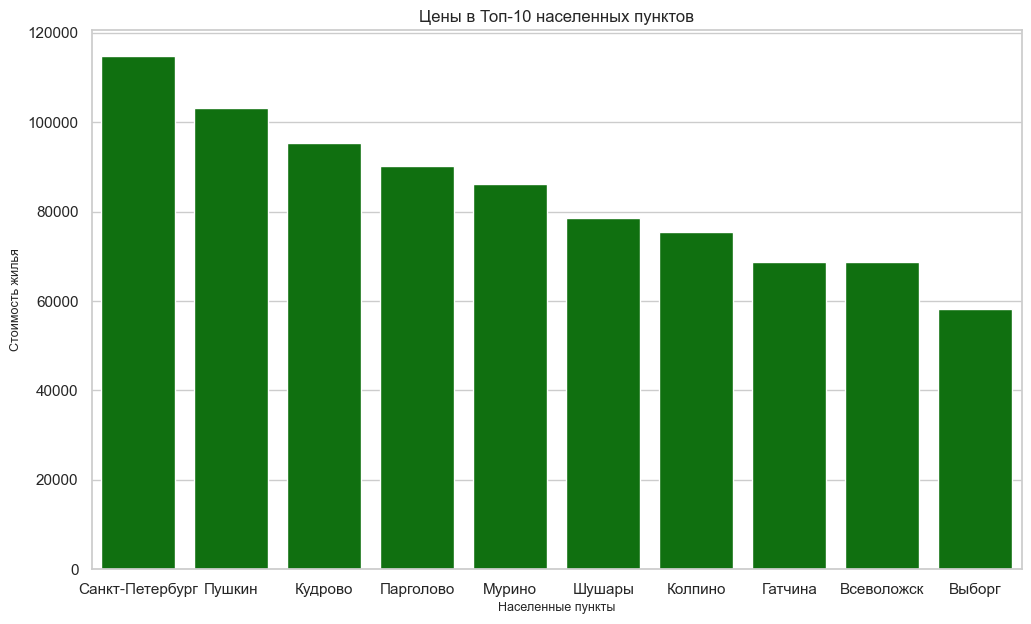

In [53]:
#посчитаем среднее значение кв. м. в разрезе населенных пунктов
data_top_10_pivot = data_top_10.pivot_table(index= 'locality_name', values='m2_price', aggfunc='mean').reset_index().\
    sort_values(by='m2_price', ascending=False)
display(data_top_10_pivot)

#построим столбчатую диаграмму
fig, ax = plt.subplots(figsize=(12, 7))
gfg = sns.barplot(x=data_top_10_pivot['locality_name'], y=data_top_10_pivot['m2_price'], ax=ax, color = 'green')

gfg.set_title("Цены в Топ-10 населенных пунктов", fontsize = 12) 
gfg.set_xlabel("Населенные пункты", fontsize = 9)
gfg.set_ylabel("Стоимость жилья", fontsize = 9)

Посчитали стоимость кв.м. в 10 самых популярных населенных пунктах. Ожидаемо самая высокая цена в самом Санкт-Петербурге. Дешевле всего обойдется жилье в Выборге.

<Axes: title={'center': 'Самые дорогие квартиры находятся в центре'}, xlabel='to_citycenter_km'>

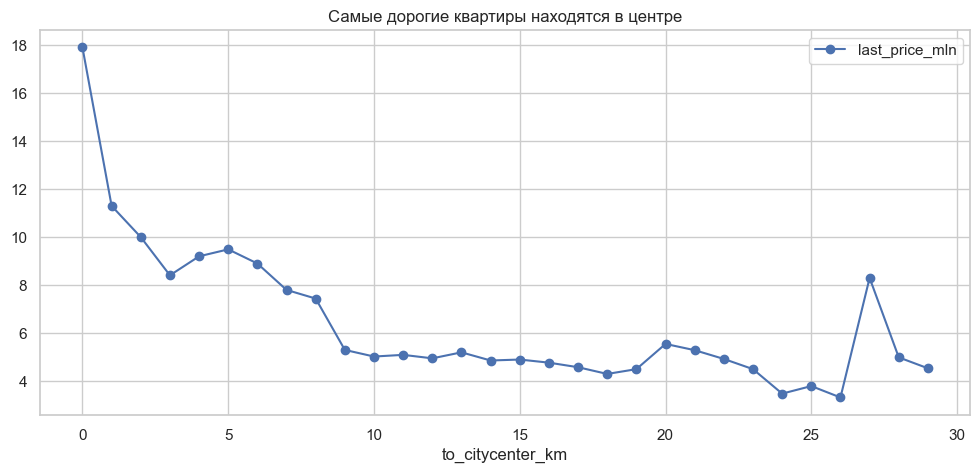

In [54]:
#вычислим среднюю стоимость квартир на разном удалении от центра Санкт-Петербурга
data_top_10_spb = data_top_10.query('locality_name == "Санкт-Петербург"')
data_top_10_spb ['km_price'] = data_top_10_spb ['last_price_mln'] / data_top_10 ['to_citycenter_km']
data_top_10_spb_pivot = data_top_10_spb.pivot_table(index ='to_citycenter_km', \
        values = 'last_price_mln', aggfunc = 'median')
data_top_10_spb_pivot.plot(title='Самые дорогие квартиры находятся в центре', style='-o', grid=True, figsize=(12, 5))

Посмотрели, как ведут себя цены в Санкт-Петербурге из расчета цены за каждый км удаления от центра города. Самые дорогие - в радиусе 5 км от центра, далее идет резкое снижение в диапазоне (5:10) км. Далее цена незначительно колеблется для диапазона (10:20) км, и свыше 20 км данные сильно неоднородны, вероятно, влияние на цену могут оказывать другие факторы.

In [55]:
# создадим таблицу только с интересующими нас столбцами
data_pivot = data[['total_area', 'living_area', 'kitchen_area', 'rooms',  \
                   'day_publication', 'month_publication', 'year_publication', 'last_price_mln']]

,total_area,living_area,kitchen_area,rooms,day_publication,month_publication,year_publication,last_price_mln
total_area,1.000000,0.937968,0.598894,0.755019,-0.005018,0.004916,-0.081522,0.643871
living_area,0.937968,1.000000,0.412919,0.843011,-0.006144,-0.001897,-0.074299,0.559578
kitchen_area,0.598894,0.412919,1.000000,0.258082,-0.008599,0.002700,-0.056385,0.509694
rooms,0.755019,0.843011,0.258082,1.000000,-0.004863,-0.003107,-0.054815,0.358934
day_publication,-0.005018,-0.006144,-0.008599,-0.004863,1.000000,0.011707,-0.004824,0.002104
month_publication,0.004916,-0.001897,0.002700,-0.003107,0.011707,1.000000,-0.269279,0.000835
year_publication,-0.081522,-0.074299,-0.056385,-0.054815,-0.004824,-0.269279,1.000000,-0.043697
last_price_mln,0.643871,0.559578,0.509694,0.358934,0.002104,0.000835,-0.043697,1.000000


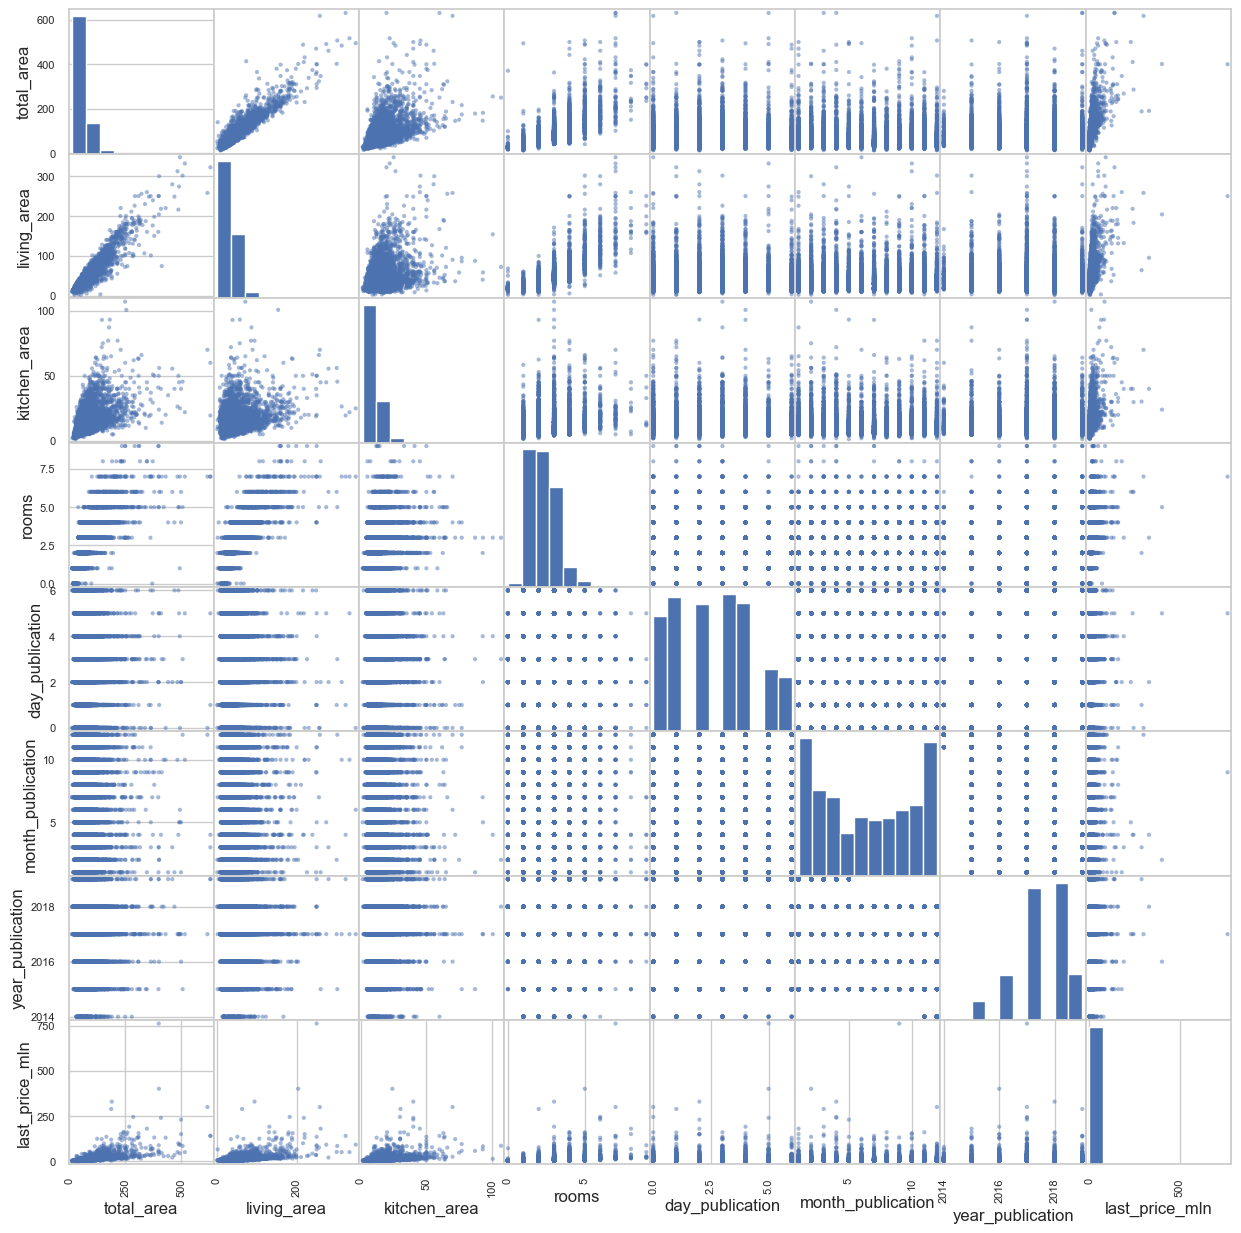

In [56]:
# посчитаем корреляцию между значениями новой таблицы
pd.plotting.scatter_matrix(data_pivot, figsize=(15,15))
data_pivot.corr()

In [47]:
#добавим столбец с типом этажа
data_pivot['floor_type'] = data['floor_type']

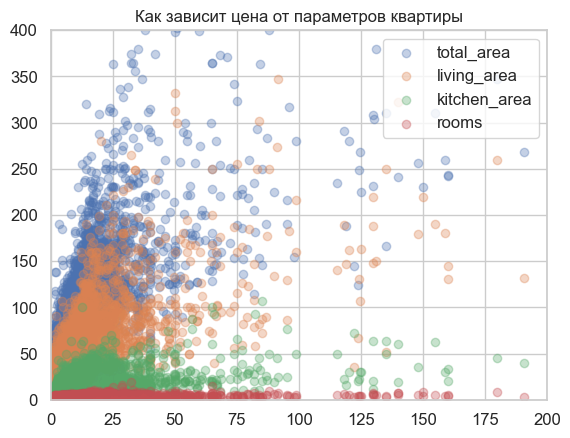

In [48]:
# построим диаграммы рассеяния для четырех параметров
params = ['total_area', 'living_area', 'kitchen_area', 'rooms']
for p in params:
    plt.scatter(x = 'last_price_mln' , y = p, data= data_pivot, alpha = 0.33)
plt.xticks(fontsize=12)
plt.xlim (0, 200)
plt.ylim (0, 400)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)    
plt.title('Как зависит цена от параметров квартиры')
plt.show()

С помощью диаграммы рассеяния мы видим влияние общей площади квартиры на ее стоимость. Коэффициент корреляции Пирсона высок (0,65), что означает, что величины зависимы друг от друга, но влияют так же и другие факторы. Коэффициент корреляции Пирсона зависимости цены от жилой площади и от кухни - 0,56 и 0,51 соответственно, что значит среднюю степень влияния этих параметров на ценообразование.
Количество комнат значительно меньше влияет на стоимость, коэффициент 0,36.
Также мы выявили очевидную закономерность зависимости этих величин между собой. Жилая площадь и кухня связаны с общей площадью коээфициентами корреляции 0,94 и 0,6. Также велика зависимость общей и жилой площадей от количества комнат - 0,76 и 0,84 соответственно.

,parks_nearest,ponds_nearest,last_price
parks_nearest,1.000000,0.000477,-0.016617
ponds_nearest,0.000477,1.000000,-0.085334
last_price,-0.016617,-0.085334,1.000000


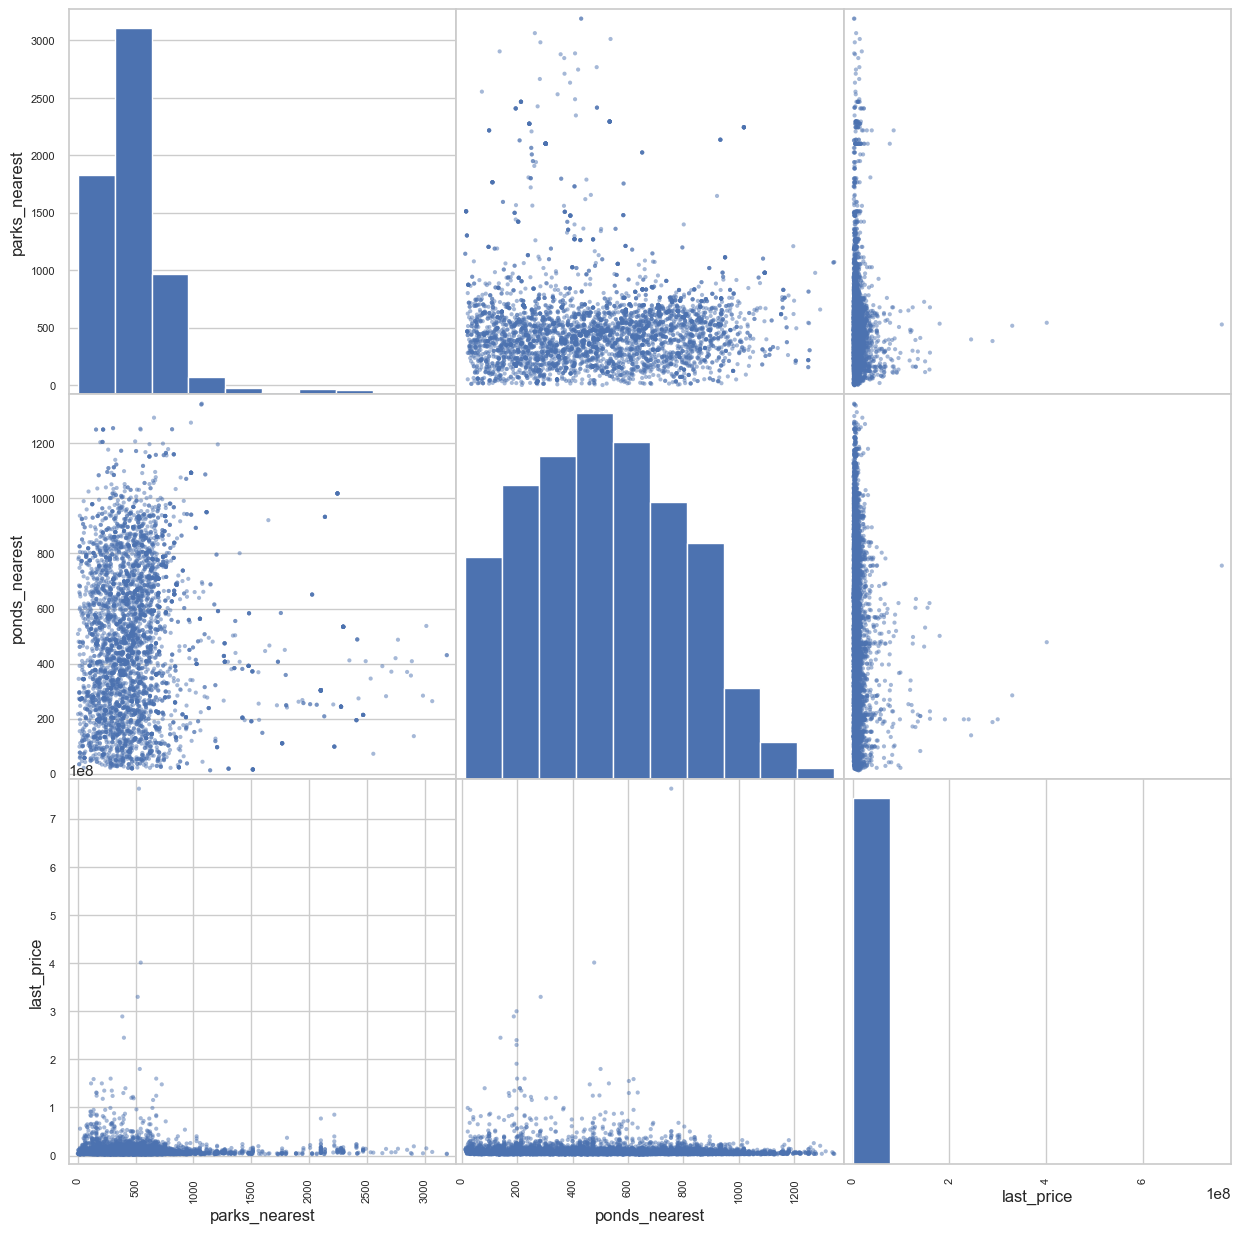

In [57]:
#проверим зависимость цены от еще четырех параметров
data_pivot = data[['parks_nearest', 'ponds_nearest', 'last_price']]

pd.plotting.scatter_matrix(data_pivot, figsize=(15,15))
data_pivot.corr()

Исследовав влияние наличия парков и водоемов и расстояния до них можно сказать, что в некоторых случаях при наличии парка или водоема в радиусе до 0,8 км, стоимость квартиры может может быть выше. В целом же, ориентируясь на коэффициенты корреляции считаем, что связь очень низкая.

0.4

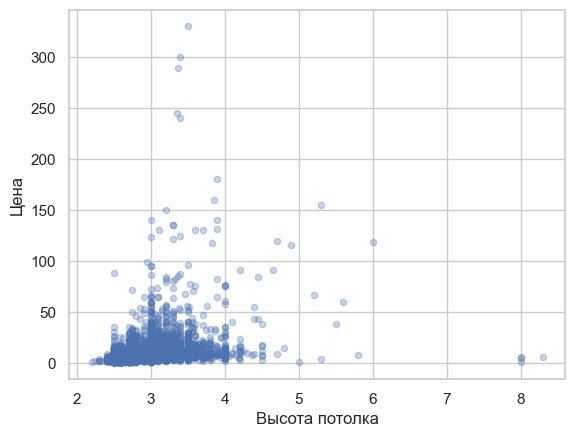

In [59]:
#исследуем влияние высоты потолка на стоимость квартиры
gfg = data.plot(x = 'ceiling_height', y ='last_price_mln', kind= 'scatter', grid = True, alpha = 0.3)
gfg.set_xlabel("Высота потолка", fontsize = 12)
gfg.set_ylabel("Цена", fontsize = 12)

display(data['ceiling_height'].corr(data['last_price_mln']).round(2))

По графику зависимости цены от высоты потолка однозначно сказать затруднительно, имеется ли прямая зависимость указанных величин. Однако мы видим, что выбивающиеся значения цен приходятся, в основном, на высоту потолка от 2,7 м и выше. Это может объясняться тем, что высокие потолки встречаются как в квартирах "сталинках" и новостройках начиная от класса "комфорт" и выше, так и в старом фонде, где высокие потолки (более 3 м) скорее недостаток, чем преимущество.  Коэф. кор. 0,4 говорит о наличии слабой зависимости цены от высоты потолка в квартире. Таким образом, удорожание квартир с более высокими потолками имеет взаимосвязь с другими факторами.

In [60]:
# узнаем как менялась стоимость квадратного метра и стоимость квартир по годам
data_price = data.pivot_table(index = ['year_publication'], values = ['m2_price', 'last_price_mln'], aggfunc=['mean', 'count']).reset_index()
# переименуем столбцы для дальнейших манипуляций с ними
data_price.columns = ['year_publication', 'last_price_mln', 'm2_price', 'count', 'delete']
data_price['m2_price'] = data_price['m2_price'].round(2)
data_price['last_price_mln'] = data_price['last_price_mln'].round(2)
#исключим дублирующийся столбец
data_price.drop('delete', axis = 1, inplace = True)
data_price

,year_publication,last_price_mln,m2_price,count
0,2014,12.09,124830.43,137
1,2015,8.56,104660.54,1189
2,2016,6.81,98340.34,2779
3,2017,6.54,97603.76,8171
4,2018,5.95,97850.46,8492
5,2019,6.77,107282.35,2867


Text(0, 0.5, 'Количество публикаций объявлений')

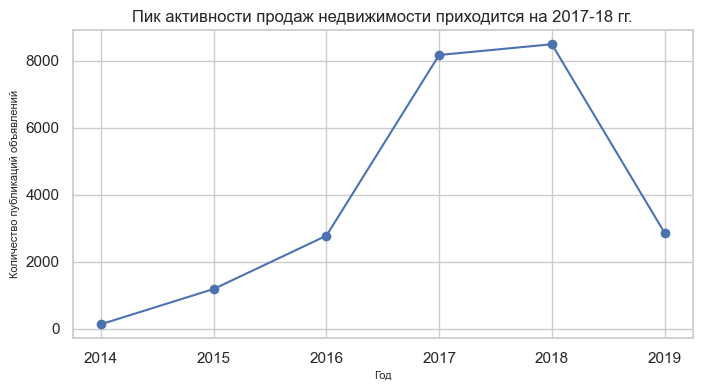

In [61]:
gfg = data_price.plot(x = 'year_publication', y ='count', title='Пик активности продаж недвижимости приходится на 2017-18 гг.', \
                style='-o', grid=True, figsize=(8, 4), legend = False)

gfg.set_xlabel("Год", fontsize = 8)
gfg.set_ylabel("Количество публикаций объявлений", fontsize = 8)

Text(0, 0.5, 'Цена за м2')

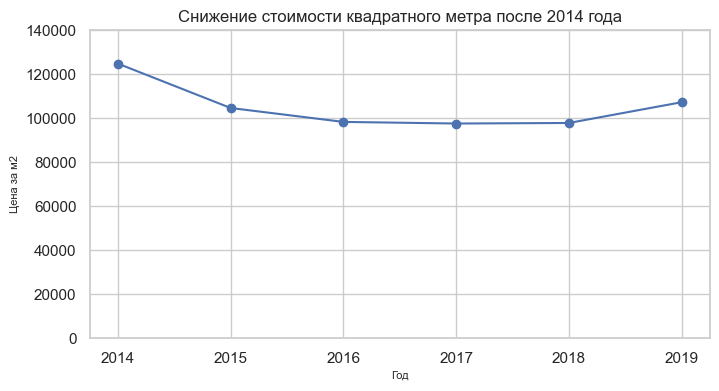

In [62]:
gfg = data_price.plot(x = 'year_publication', y ='m2_price', title='Снижение стоимости квадратного метра после 2014 года', \
                style='-o', grid=True, figsize=(8, 4), legend = False)
gfg.set_yticks(np.arange(0, 150000, step=20000))
gfg.set_xlabel("Год", fontsize = 8)
gfg.set_ylabel('Цена за м2', fontsize = 8)

Text(0, 0.5, 'Цена за м2, млн')

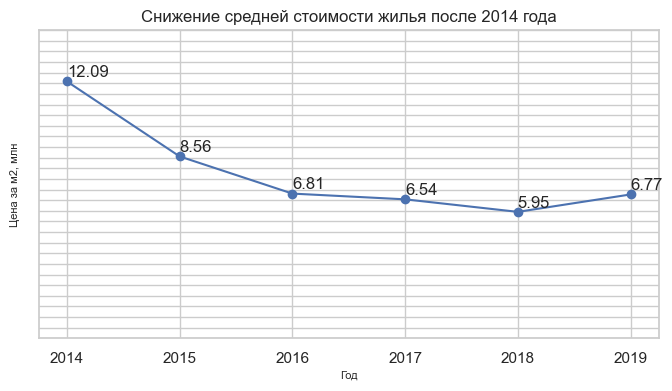

In [63]:
gfg = data_price.plot(x = 'year_publication', y ='last_price_mln', title='Снижение средней стоимости жилья после 2014 года', \
                style='-o', grid=True, figsize=(8, 4), legend = False)
gfg.set_yticks(np.arange(0, 15, step=0.5))
gfg.set_yticklabels('')
#добавим на график метки значений
for d,t in zip(data_price['year_publication'], data_price['last_price_mln']):
    gfg.text(d, t+0.2, t);
gfg.set_xlabel("Год", fontsize = 8)
gfg.set_ylabel('Цена за м2, млн', fontsize = 8)

На последних трех графиках можно заметить следующие тенденции:
- количество публикаций о продаже квартир с 2014 по 2017 стремительно росло и достигло пика в 2018 году, затем пошло на спад;
- стоимость кв. м. жилья в 2015 года снизилась по сравнению с 2014, и до 2018 года держалась примерно на одном уровне, то же самое можно сказать про среднюю стоимость жилья.

## Общий вывод

### Проведена предобработка данных, а именно:
- устранены дубликаты в наименованиях населенных пунктов;
- обработаны выбивающиеся численные значения (высота потолка, количество комнат);
- заполнены отсутствующие значения (наличие балкона при отсутствии информации считаем, что его нет; является ли жилье апартаментами полагаем, что нет; студией - нет);
- проведена замена типа данных, содержащих численные и булевы значения;

### Отмечены следующие наблюдения:
- в среднем квартиры продаются за полгода. Быстрые продажи укладываются в 45 дней (1,5 месяца), долгие - длятся свыше 245 дней (более полугода).
- в 2017-2018 годах был бум продаж с одновременным существенным ростом цен на недвижимость. В 2019 темпы продаж и цены более-менее выровнялись, однако же превысили отметки 2016 года и более ранних периодов.

### Сделаны выводы о стоимости жилья в Санкт-Петербурге и его пригородах:
- цена имеет прямую зависимость в большей степени от площади квартиры в целом, и чуть в меньшей степени отдельных ее помещений  (кухни, жилой площади, количества балконов), высотности этажа (первый этаж традиционно имеет более низкую стоимость, в то время как цены на последний этаж варьируются от средней цены между категориями "первый" и "другой" и достигает стоимости квартир на прочих этажах, очевидно, под влиянием иных факторов). Параметр "высота потолка" также является не основным в ценообразовании, т.к. может быть как признаком "элитного" жилья, так и достоянием более бюджетного "старого фонда".
- в среднем квартиры продаются за 180 дней, самая быстрая продажа произошла за 1 день, самая долгая длилась 1580 дней. Медианное значение - 95 дней (3 месяца).
Быстрыми можно считать продажи, укладывающиеся в значения первого квартиля - до 45 дней (1,5 месяца), долгими - те, что длились свыше 245 дней (более полугода).
- самая высокая цена на квартиры непосредственно в самом Санкт-Петербурге. Дешевле всего обойдется жилье в Выборге.
- на ценообразование практически не влияет наличие поблизости парков и водоемов, расстояния до них, а также является ли квартира студией или апартаментами и какое количество фотографий в объявлении.
- количество публикаций о продаже квартир с 2014 по 2017 стремительно росло и достигло пика в 2018 году, затем пошло на спад;
- стоимость кв. м. жилья в 2015 года снизилась по сравнению с 2014, и до 2018 года держалась примерно на одном уровне, то же самое можно сказать про среднюю стоимость жилья.